# Project 2 - Ames Housing Data and Kaggle Challenge
---

## Context & Problem Statement

**Context:** We are tasked to assist property agents in creating models for predicting the house prices in Ames (Iowa, USA). The models generated needs to be accurate, while still being explainable. We are also tasked to provide explanation for the most important factors in determining a house price, as well as provide a heuristic model (mental shortcuts) for quickly gauging the price of a house. The models will be used for the realtors in generating a baseline pricing for valuation of the house.

**Problem Statement:**
- Investigate the following questions on feature selection:
    - How well does the different regularization techniques (L1, L2, ElasticNet) work in selecting the best feature for prediction?
    - Which features can best predict house prices?
- Investigate the trade off between number of features versus the accuracy of the model
- Propose several methods for further feature engineering after feature selection through regularization.

## Library and Data Imports

In [1]:
## library imports

# data processing imports
import pandas as pd
import numpy as np

# plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

# modelling imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, RepeatedKFold

# metric imports
from sklearn import metrics 

# misc imports
import warnings
from sklearn.exceptions import ConvergenceWarning

In [2]:
## Settings
sns.set_style("darkgrid") # setting seaborn style

# enable inline plotting
%matplotlib inline 

pd.set_option('display.max_columns', None) # disable column overflow in pandas display, this is toenable us to display all the columns

In [3]:
presentation_plotting = False # don't comment this part out

# # Settings for presentation plotting

# sns.set(style="darkgrid", context="talk", palette="Set2")

# sns.color_palette("pastel")

# plt.rcParams.update({"axes.facecolor":'#10131a', 
#                      "figure.facecolor":'#1b212c'})

# textcolor = 'white'
# plt.rcParams.update({"text.color":textcolor, 
#                      "axes.labelcolor":textcolor,
#                      "xtick.color":textcolor,
#                      "ytick.color":textcolor})


# plt.rcParams.update({"grid.linewidth":0.5, 
#                      "grid.alpha":0.5})
# plt.rcParams["figure.figsize"] = (12, 9)

# presentation_plotting = True


# # commented out for notebook setting

In [4]:
## Data import
df = pd.read_csv('../datasets/train.csv') # importing training data set
df.head() # display the head

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## Data Dictionary

The following table summarizes the available features, along with its description ([Source](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=data_description.txt))

The meaning behind each of the features can also be viewed in the [data documentation](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

|Data|Description|
|---|---|
|SalePrice|The property's sale price in dollars. This is the target variable that you're trying to predict.
|MSSubClass|The building class
|MSZoning|The general zoning classification
|LotFrontage|Linear feet of street connected to property
|LotArea|Lot size in square feet
|Street|Type of road access
|Alley|Type of alley access
|LotShape|General shape of property
|LandContour|Flatness of the property
|Utilities|Type of utilities available
|LotConfig|Lot configuration
|LandSlope|Slope of property
|Neighborhood|Physical locations within Ames city limits
|Condition1|Proximity to main road or railroad
|Condition2|Proximity to main road or railroad (if a second is present)
|BldgType|Type of dwelling
|HouseStyle|Style of dwelling
|OverallQual|Overall material and finish quality
|OverallCond|Overall condition rating
|YearBuilt|Original construction date
|YearRemodAdd|Remodel date
|RoofStyle|Type of roof
|RoofMatl|Roof material
|Exterior1st|Exterior covering on house
|Exterior2nd|Exterior covering on house (if more than one material)
|MasVnrType|Masonry veneer type
|MasVnrArea|Masonry veneer area in square feet
|ExterQual|Exterior material quality
|ExterCond|Present condition of the material on the exterior
|Foundation|Type of foundation
|BsmtQual|Height of the basement
|BsmtCond|General condition of the basement
|BsmtExposure|Walkout or garden level basement walls
|BsmtFinType1|Quality of basement finished area
|BsmtFinSF1|Type 1 finished square feet
|BsmtFinType2|Quality of second finished area (if present)
|BsmtFinSF2|Type 2 finished square feet
|BsmtUnfSF|Unfinished square feet of basement area
|TotalBsmtSF|Total square feet of basement area
|Heating|Type of heating
|HeatingQC|Heating quality and condition
|CentralAir|Central air conditioning
|Electrical|Electrical system
|1stFlrSF|First Floor square feet
|2ndFlrSF|Second floor square feet
|LowQualFinSF|Low quality finished square feet (all floors)
|GrLivArea|Above grade (ground) living area square feet
|BsmtFullBath|Basement full bathrooms
|BsmtHalfBath|Basement half bathrooms
|FullBath|Full bathrooms above grade
|HalfBath|Half baths above grade
|Bedroom|Number of bedrooms above basement level
|Kitchen|Number of kitchens
|KitchenQual|Kitchen quality
|TotRmsAbvGrd|Total rooms above grade (does not include bathrooms)
|Functional|Home functionality rating
|Fireplaces|Number of fireplaces
|FireplaceQu|Fireplace quality
|GarageType|Garage location
|GarageYrBlt|Year garage was built
|GarageFinish|Interior finish of the garage
|GarageCars|Size of garage in car capacity
|GarageArea|Size of garage in square feet
|GarageQual|Garage quality
|GarageCond|Garage condition
|PavedDrive|Paved driveway
|WoodDeckSF|Wood deck area in square feet
|OpenPorchSF|Open porch area in square feet
|EnclosedPorch|Enclosed porch area in square feet
|3SsnPorch|Three season porch area in square feet
|ScreenPorch|Screen porch area in square feet
|PoolArea|Pool area in square feet
|PoolQC|Pool quality
|Fence|Fence quality
|MiscFeature|Miscellaneous feature not covered in other categories
|MiscVal|$Value of miscellaneous feature
|MoSold|Month Sold
|YrSold|Year Sold
|SaleType|Type of sale
|SaleCondition|Condition of sale

In [5]:
# Casting the data dictionary into a python dictionary
data_dictionary = pd.read_csv('../datasets/datadictionary.csv',index_col=0).to_dict()['Description']

## Data Cleaning

### Deleting Index (ID) columns

Identification (ID) columns should be deleted as they provide no predictive capability

In [6]:
df.drop(['Id','PID'],axis=1,inplace=True)

### Checking for Null Values

In [7]:
nulls = pd.DataFrame() # instantiate dataframe to store info on null values in different columns
nulls['no_of_null'] = df.isnull().sum() # calculate the number of nulls in each column
nulls['ratio_of_null'] = nulls['no_of_null'] / df.shape[0] # calculate the ratio of nulls to number of rows in each column
nulls[~(nulls==0).all(axis=1)] # show all columns with null values

,no_of_null,ratio_of_null
LotFrontage,330,0.160897
Alley,1911,0.931741
MasVnrType,22,0.010726
MasVnrArea,22,0.010726
BsmtQual,55,0.026816
BsmtCond,55,0.026816
BsmtExposure,58,0.028279
BsmtFinType1,55,0.026816
BsmtFinSF1,1,0.000488
BsmtFinType2,56,0.027304


### Dealing with Null Values

#### Columns with High Ratio (> 90%) of Null Values

In [8]:
nulls[nulls['ratio_of_null'] > 0.9] # displaying columns with high ratio of null values

,no_of_null,ratio_of_null
Alley,1911,0.931741
PoolQC,2042,0.995612
MiscFeature,1986,0.968308


Typically these columns with high null ratios should be dropped. However, according to the data documentations, the null values here refer to the absence of such feature. As such we will impute the null values as the string 'NA'.

In [9]:
cols_to_impute = nulls[nulls['ratio_of_null'] > 0.9].index # getting the column names to be dropped
df[cols_to_impute] = df[cols_to_impute].fillna('NA') # imputing the columns based on list above

#### Columns with Low Ratio (< 10%) of Null Values

Generally columns with low ratio of null values can be imputed. The following sections discusses the various strategies used for Imputation on the various columns:

##### Garage-Related Columns

The NaN values in Garage is due to the absence of garage in the house. Hence we can impute the numerical values as 0, and create a new category for all the categorical variables which states 'No Garage'

In [10]:
garage_cols = [col for col in nulls.index if 'Garage' in col] # selecting all the columns that contains the word 'Garage'
df[garage_cols].dtypes # testing the data type of the garage-related columns

GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageCars      float64
GarageArea      float64
GarageQual       object
GarageCond       object
dtype: object

In [11]:
garage_cols_categorical = df[garage_cols].select_dtypes('object').columns # selecting garage-related columns with categorical values
df[garage_cols_categorical] = df[garage_cols_categorical].fillna('NA') # imputing the columns with 'NA'

In [12]:
df[['GarageCars','GarageArea']] = df[['GarageCars','GarageArea']].fillna(0) # imputing the numerical columns with 0 (no garage)

Unlike the no of cars and Garage Area, we would not be able to impute the year with 0, instead, we can impute the mean value for the year (will be done in later cells)

##### Remaining Columns

In [13]:
cols_to_impute = nulls[(nulls['ratio_of_null'] < 0.1) & (~(nulls==0).all(axis=1))].index # getting the column names to be imputed

In [14]:
# imputing numeric columns with column-wise mean
cols_to_impute_numeric = df[cols_to_impute].select_dtypes(np.number).columns # getting numeric column names to be imputed
df[cols_to_impute_numeric] = df[cols_to_impute_numeric].fillna(df[cols_to_impute_numeric].mean()) # imputing the numeric columns using its column-wise mean

In [15]:
# imputing categoric columns with column-wise mode
cols_to_impute_categoric = df[cols_to_impute].select_dtypes(['object']).columns # getting categoric column names to be imputed

for column in cols_to_impute_categoric: # imputing the categoric columns using its mode
    column_mode = df[column].mode()[0] # getting the column-wise mode
    df[column].fillna(column_mode,inplace=True) # imputing the NaN values with mode

#### Remainder of Columns

In [16]:
nulls[(nulls['ratio_of_null'] >= 0.1) & (nulls['ratio_of_null'] <= 0.9)]

,no_of_null,ratio_of_null
LotFrontage,330,0.160897
FireplaceQu,1000,0.487567
Fence,1651,0.804973


##### Lot Frontage

Since there are 60% of the data missing we need to use a more advanced method for imputation

Text(0.5, 0, 'Lot Frontage Is NaN')

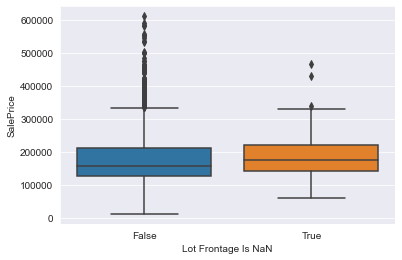

In [17]:
# checking if NaN values are disproportionately located at specific SalePrice
sns.boxplot(x=df['LotFrontage'].isna(),y=df['SalePrice']) # plotting the boxplot for lot frontage is NaN or not NaN
plt.xlabel('Lot Frontage Is NaN')

It seems that the missing values are not a predictor for the sale price. Hence we can try to impute using regression-based techniques.

In [18]:
# finding column with highest correlation for Lot Frontage
df.corr()['LotFrontage'].sort_values(ascending=False).head()

LotFrontage     1.000000
LotArea         0.574024
1stFlrSF        0.463900
GrLivArea       0.383856
TotRmsAbvGrd    0.362704
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

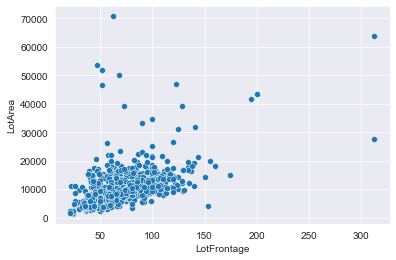

In [19]:
# plotting the correlation between Lot Area and Lot Frontage
sns.scatterplot(x=df['LotFrontage'],y=df['LotArea'])

In [20]:
# using simple linear regression model for imputing the value of Lot Frontage based on Lot Area

# importing models from sklearn
from sklearn import linear_model

df_impute = df[['LotArea','LotFrontage']] # create dataframe for imputing
df_impute = df_impute.dropna() # drop the NaN values from imputation dataframe

# # create a Linear Regression model to estimate the missing data
impute_model = linear_model.LinearRegression() # instantiate LR model
impute_model.fit(X = df_impute['LotArea'].values.reshape(-1, 1), y = df_impute['LotFrontage'].values) # fitting the model based on the imputation dataframe

df['LotFrontageIMPUTED'] = impute_model.predict(df['LotArea'].values.reshape(-1, 1)) # getting the imputation value from the impute model

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontageIMPUTED']) # imputing the missing value in Lot Frontage

df.drop('LotFrontageIMPUTED',axis=1,inplace=True)# dropping the IMPUTED column

##### Fireplace Qu

In [21]:
# looking at the fireplace columns
df[['Fireplaces','FireplaceQu']].head()

,Fireplaces,FireplaceQu
0,0,NaN
1,1,TA
2,0,NaN
3,0,NaN
4,0,NaN


It seems that the null values correspond to rows with no fireplaces

In [22]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA') # filling the NaN values with the text 'NoFireplace

##### Fence

In [23]:
df['Fence'] = df['Fence'].fillna('NA') # filling the NaN values with the text 'NoFence'

#### Check that there is no more nan values

In [24]:
df.isna().sum().sum()

0

There are no more null values in the dataframe

## Setting Up Features and Target Variables

In [25]:
X = df.drop('SalePrice',axis=1) # define features matrix
y = df['SalePrice'] # define prediction matrix

## Dealing with Categorical Features

In [26]:
def display_categorical_column_contents():
    categorical_column_contents = {} # instantiate a dictionary

    for column in X.select_dtypes('object').columns: # looping through each column, and obtaining the various unique categories from each column
        categorical_column_contents[column] = str(df[column].unique())

    categorical_column_contents = pd.DataFrame(categorical_column_contents,index=[0]).T # converting the data type to a dataframe

    return categorical_column_contents # displaying the dataframe

In [27]:
display_categorical_column_contents()

,0
MSZoning,['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (a...
Street,['Pave' 'Grvl']
Alley,['NA' 'Pave' 'Grvl']
LotShape,['IR1' 'Reg' 'IR2' 'IR3']
LandContour,['Lvl' 'HLS' 'Bnk' 'Low']
Utilities,['AllPub' 'NoSeWa' 'NoSewr']
LotConfig,['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
LandSlope,['Gtl' 'Sev' 'Mod']
Neighborhood,['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards'...
Condition1,['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' ...


### Converting Ordinal Categorical Variables

Some of the categorical variables included in the datasets are ordinal variables, as such, they can be assigned a numerical value based on the order of the categories.

For this project, we will first attempt to use a linearly scaled order (i.e.: 0, 1, 2, 3, 4, 5, etc) and then observe if there are any non-linearity with the target variable in the later stage of the project.

In [28]:
grade_columns = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond','PoolQC'] # storing the columns which contains grading
grade_scoring = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5} # assinging each grade an ordinal score

for column in grade_columns:
    X[column] = X[column].map(grade_scoring) # replacing the grades with the scoring

In [29]:
# assigning the score to each of the ordinal category

X['LotShape'] = X['LotShape'].map({'IR3':0,'IR2':1,'IR1':2,'Reg':3})
X['Utilities'] = X['Utilities'].map({'NoSeWa':0,'NoSewr':1,'AllPub':2})
X['LandSlope'] = X['LandSlope'].map({'Sev':0,'Mod':1,'Gtl':2})
X['BsmtExposure'] = X['BsmtExposure'].map({'Gd':0,'Av':1,'Mn':2,'No':3})
X['BsmtFinType1'] = X['BsmtFinType1'].map({'Unf':0,'LwQ':1,'Rec':2,'BLQ':3,'ALQ':4,'GLQ':5})
X['BsmtFinType2'] = X['BsmtFinType2'].map({'Unf':0,'LwQ':1,'Rec':2,'BLQ':3,'ALQ':4,'GLQ':5})
X['Electrical'] = X['Electrical'].map({'Mix':0,'FuseP':1,'FuseF':2,'FuseA':3,'SBrkr':4})
X['Functional'] = X['Functional'].map({'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,'Mod':4,'Min2':5,'Min1':6,'Typ':7})
X['GarageFinish'] = X['GarageFinish'].map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
X['PavedDrive'] = X['PavedDrive'].map({'N':0,'P':1,'Y':2})
X['Fence'] = X['Fence'].map({'NA':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':0})

### One-Hot Encoding for Nominal Categorical Variables

The remainder columns are all nominal categorical variables and can then be one-hot encoded

In [30]:
X_dummies = pd.get_dummies(X.select_dtypes('object'),drop_first=True) # getting the dummy variables from only the categorical variables
X = X.drop(X.select_dtypes('object').columns,axis=1) # dropping the columns with categorical variables
X = pd.concat([X,X_dummies],axis=1) # concatenating the numerical X matrix (X) and the dummified categorical X matrix (X_dummies)

## Exploratory Data Analysis

### Distribution of Target Variable

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

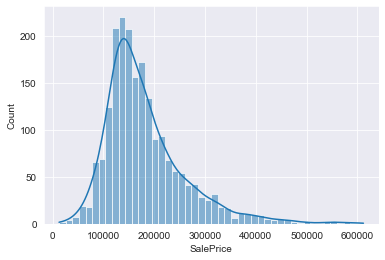

In [31]:
sns.histplot(y,kde=True)

In [32]:
pd.DataFrame(y.describe())

,SalePrice
count,2051.000000
mean,181469.701609
std,79258.659352
min,12789.000000
25%,129825.000000
50%,162500.000000
75%,214000.000000
max,611657.000000


The target variable seem to be normally distributed with a long right tail.

### Multi-colinearity

In simple linear regression models, multicollinearity should be avoided to prevent unstable models (i.e.: models and coefficients that fluctuates wildly with small changes in the input parameters) ([source](https://en.wikipedia.org/wiki/Multicollinearity)). 

<AxesSubplot:>

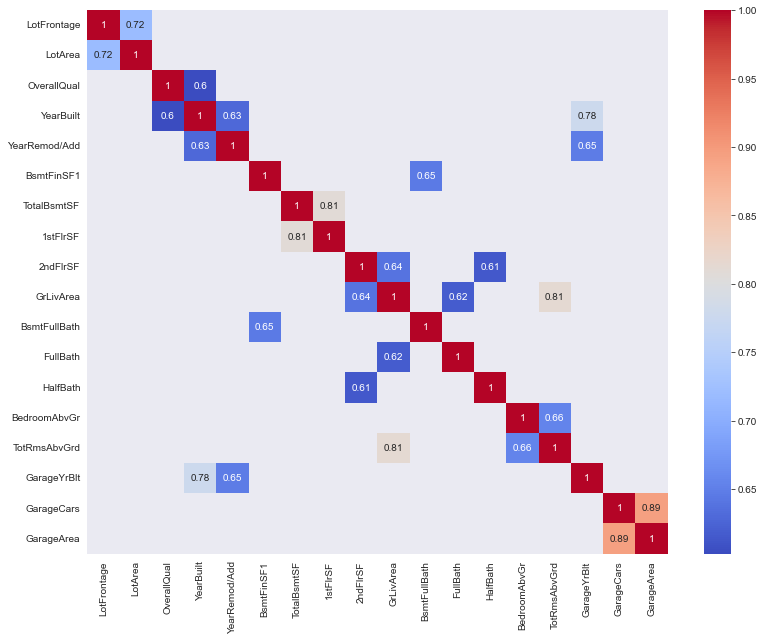

In [33]:
df_correlation = df.drop('SalePrice',axis=1).corr() # Creating a correlation data frame
cutoff = 0.6 # setting a cutoff value for highly correlated variables
df_correlation[(df_correlation < cutoff) & (df_correlation > - cutoff)] = np.nan # deleting all the values with correlation lower than the cut-off
correlated_columns = df_correlation[df_correlation.sum() != 1].index # getting the columns with high correlation

df_correlation = df[correlated_columns].corr() # selecting only the columns with high correlation, and repeating the process
df_correlation[(df_correlation < cutoff) & (df_correlation > - cutoff)] = np.nan # deleting all the values with correlation lower than the cut-off

plt.figure(figsize=(13,10))
sns.heatmap(df_correlation,annot=True,cmap='coolwarm')

The figure above indicates several highly correlated features. However, most of these features are indeed various property of the house which are typically highly correlated (e.g.: garage year built would be highly correlated with the latest remodelling year and the actual year built). However, each of the variable would remain important.

However, there is one problematic pair of features, which are 'garage cars' and 'garage area'. This is because the former is a direct function of the latter. This results in extremely high correlation between the features (in fact, the highest correlation between all the pair of variables)

As such, including both features in the model would result in multicolinearity. Therefore, we would need to drop one of the features from the model.

The selection on which model to drop can be based on the correlation between each of the feature to the target variable:

In [34]:
df.corr()['SalePrice'][['GarageCars','GarageArea']]

GarageCars    0.647781
GarageArea    0.649897
Name: SalePrice, dtype: float64

We will drop the GarageCars feature, as it has a lower correlation to the target variable.

In [35]:
X.drop('GarageCars',axis=1,inplace=True)

### Correlation with Target Variable

One simple method for feature selection involves investigating the correlation of each feature to the target variable.

In [36]:
correlation = pd.concat([X,y],axis=1).corr()['SalePrice'].drop('SalePrice').abs().sort_values(ascending=False) # getting the ABSOLUTE correlation values between all the features and the target variable
# the absolute correlation values are used here as Both highly positive and highly negative correlation indicates high predictive value

Text(0, 0.5, 'Correlation Coefficient with Target Variable')

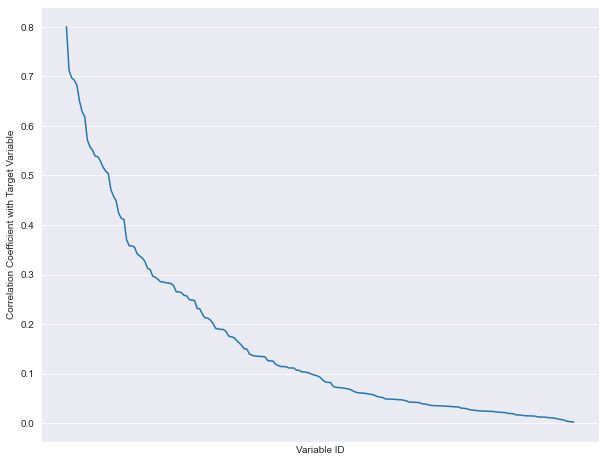

In [37]:
plt.figure(figsize=(10,8))
correlation.plot(kind='line')
plt.xticks([])
plt.xlabel('Variable ID')
plt.ylabel('Correlation Coefficient with Target Variable')

The graph above shows that there are few features that has very high correlation, while a lot of features have medium or low correlation.

We shall now note the top 10 variables with high correlation to the target variable:

In [38]:
print(correlation.head(10).index)

Index(['OverallQual', 'ExterQual', 'GrLivArea', 'KitchenQual', 'BsmtQual',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'GarageFinish'],
      dtype='object')


One simple feature selection method is to run a linear regression model with the feature above.

However in this project we will compare the result from this simple feature selection technique, against the result from the regularization technique.

## Modelling

### Train-Test Split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Standardize Data

It is important to standardize the data before putting them through regularization techniques.

"Lasso regression puts constraints on the size of the coefficients associated to each variable. However, this value will depend on the magnitude of each variable. The result of centering the variables means that there is no longer an intercept. This applies equally to ridge regression." ([source](https://www.kaggle.com/questions-and-answers/59305))

In [40]:
x_scaler = StandardScaler() # initialize the scaler

X_train = x_scaler.fit_transform(X_train) # fit and transform the X_train
X_train = pd.DataFrame(X_train,columns=X.columns) # retain the name of the columns in X_train dataframe

X_test = x_scaler.transform(X_test) # transform the X_test
X_test = pd.DataFrame(X_test,columns=X.columns) #

y_scaler = StandardScaler() # initialize the scaler

y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1)) # fit and transform the X_train
y_test = y_scaler.transform(y_test.values.reshape(-1, 1)) # transform the X_test

### Model Building

In this section, we will use three different regularization techniques on the same dataset to observe the performance of the various models.

The performance will be measured based on the following:
- Number of selected variables (defined as variables with non-zero coefficients)
- Number of selected fatures (defined as features with at least one of its corresponding variable having a non-zero coefficient)
- Accuracy of the model based on the following metrics:
    - Mean Absolute Error (MAE)
    - Root Mean Squared Error (RMSE)
    - Coefficient of Determinatino (R2)
    - Adjusted Coefficient of Determination (R2_adjusted), which penalizes the R2 value with increasing number of predictors included in the regression
    
For each regularization technique, a Grid Search with 5-fold Cross-Validation will be conducted in order to obtain the best hyperparameters (alpha for L1 and L2 Regression, alpha and l1_ratio for ElasticNet Regression). The grid search algorith will then be used to find the optimal hyperparameter that will minimize the k-fold cross-validated mean absolute error from the training dataset. 

The accuracy of the model will be assessed based the prediction generated on the testing dataset. The accuracy of the different regularization techniques will be compared at the end of this section.

#### Defining functions to display regression results

In [41]:
# creating a function to display the best parameters from the GridSearchCV, along with its top features, and regression scores
def show_results(model):
    
    # displaying the best parameters
    print(f'Best config: {model.best_params_}')

    # creating dataframe for displaying the features and coeff
    coef = pd.DataFrame()
    coef['features'] = X.columns
    coef['coef'] = model.best_estimator_.coef_.reshape(-1)

    print(f"no of non-zero variables: {np.count_nonzero(model.best_estimator_.coef_)}") # displaying number of non-zero features
    display(coef[coef['coef'] != 0].sort_values('coef',ascending=False).head(5)) # show top 5 features
    display(coef[coef['coef'] != 0].sort_values('coef',ascending=False).tail(5)) # show bottom 5 features
    
    # generate y_prediction based on the model
    y_pred = model.predict(X_test)

    # displaying regression scores
    print('Regression scores')
    print(f'MAE = {metrics.mean_absolute_error(y_test, y_pred)}') # display MAE
    print(f'RMSE = {metrics.mean_squared_error(y_test, y_pred)**0.5}') # display RMSE
    print(f'R2 = {metrics.r2_score(y_test, y_pred)}') # display R2

    
# creating a function to summarize the best regression result
# this will be used to generate a comparison between the different types of regression
def export_results(model):
    # generate y_prediction based on the model
    y_pred = model.predict(X_test)
    
    results = dict() # instantiate a dictionary
    results['Regression Type'] = str(model.best_estimator_).split("(")[0]
    n = X.shape[0] # Calculate n: the number of data points news for the regression
    p = np.count_nonzero(model.best_estimator_.coef_) # calculate p: the number of variables used for the regression
    results['Non-Zero Variables'] = p
    
    features = X.columns[(model.best_estimator_.coef_ != 0).reshape(-1)] # display the names of the non-zero Variables
    features = set([feature.split('_')[0] for feature in features]) # splitting the name of the variables by '_' in order to get the original feature names, and then casting them to a set
    results['Non-Zero Features'] = len(features)
    
    results['MAE'] = metrics.mean_absolute_error(y_test, y_pred) # display MAE
    results['RMSE'] = metrics.mean_squared_error(y_test, y_pred)**0.5 # display RMSE
    R2 = metrics.r2_score(y_test, y_pred) # calculating R2
    results['R2'] = R2
    results['R2_adj'] = 1-(1-R2)*(n-1)/(n-p-1) # calculating adjusted R2
    return pd.DataFrame(results,index=[0]) # returning the dataframe

#### Model 1: LASSO (L1) Regression

In [42]:
# Use GridsearchCV to obtain the best parameter in the Lasso regression model
lasso = GridSearchCV(estimator=linear_model.Lasso(),  # setting model as lasso
                      param_grid={'alpha':np.logspace(-3,1,25)}, # defining search grid for alpha
                      scoring='neg_mean_absolute_error', # defining scoring function
                      n_jobs=-1, # setting to run on all processors
                      verbose=3 # increase verbosity to show steps (shown in the terminal)
                       ).fit(X_train, y_train) # fitting the model 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [43]:
show_results(lasso)

Best config: {'alpha': 0.006812920690579608}
no of non-zero variables: 103


,features,coef
27,GrLivArea,0.200604
6,OverallQual,0.162844
130,RoofMatl_CompShg,0.146577
90,Neighborhood_NridgHt,0.116287
96,Neighborhood_StoneBr,0.099171


,features,coef
117,BldgType_TwnhsE,-0.033772
51,PoolQC,-0.047571
0,MSSubClass,-0.062909
15,BsmtExposure,-0.069625
53,MiscVal,-0.122459


Regression scores
MAE = 0.22692294808325383
RMSE = 0.3168023829473199
R2 = 0.8924337374177431


#### Model 2: Ridge Regression

In [44]:
# Use GridsearchCV to obtain the best parameter in the ridge regression model
ridge = GridSearchCV(estimator=linear_model.Ridge(),  # setting model as ridge
                      param_grid={'alpha':np.logspace(-1,3,25)}, # defining search grid for alpha
                      scoring='neg_mean_absolute_error', # defining scoring function
                      n_jobs=-1, # setting to run on all processors
                      verbose=3 # increase verbosity to show steps (shown in the terminal)
                       ).fit(X_train, y_train) # fitting the model 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [45]:
show_results(ridge)

Best config: {'alpha': 464.15888336127773}
no of non-zero variables: 191


,features,coef
6,OverallQual,0.103757
90,Neighborhood_NridgHt,0.084623
27,GrLivArea,0.080148
96,Neighborhood_StoneBr,0.077313
11,ExterQual,0.069542


,features,coef
0,MSSubClass,-0.039944
78,Neighborhood_Edwards,-0.041966
51,PoolQC,-0.044792
15,BsmtExposure,-0.057186
53,MiscVal,-0.078884


Regression scores
MAE = 0.23315452294711794
RMSE = 0.3283289256009139
R2 = 0.8844639565478498


#### Model 3: ElasticNet

In [46]:
# Use GridsearchCV to obtain the best parameter in the elasticnet regression model
elasticnet = GridSearchCV(estimator=linear_model.ElasticNet(),  # setting model as elasticnet
                          param_grid={'alpha':[0.1], # defining search grid for alpha, default for search is [1e-2, 1e-1, 0.0, 1.0]
                                      'l1_ratio':[0.05]}, # defining search grid for l1_ratio, default for search is np.arange(0,1,0.05)
                          scoring='neg_mean_absolute_error', # defining scoring function
                          n_jobs=-1, # setting to run on all processors
                          verbose=3 # increase verbosity to show steps (shown in the terminal)
                           ).fit(X_train, y_train) # fitting the model 

# Best config: {'alpha': 0.1, 'l1_ratio': 0.05}
# The gridsearch values are adjusted here so that the gridsearch does not need to run everytime

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [47]:
show_results(elasticnet)

Best config: {'alpha': 0.1, 'l1_ratio': 0.05}
no of non-zero variables: 126


,features,coef
6,OverallQual,0.136282
27,GrLivArea,0.109045
90,Neighborhood_NridgHt,0.104301
96,Neighborhood_StoneBr,0.092435
11,ExterQual,0.078990


,features,coef
117,BldgType_TwnhsE,-0.041731
0,MSSubClass,-0.050783
51,PoolQC,-0.051156
15,BsmtExposure,-0.063476
53,MiscVal,-0.100569


Regression scores
MAE = 0.23042858375445757
RMSE = 0.3238858602436019
R2 = 0.8875697497983099


#### Baseline Model: Dummy Regression (based on target mean)

A baseline model for comparison can be obtained based on the mean of the target variables in the training dataset. 

One simple way to create this dummy regressor (in order to be consistent with the previous method, and be able to use the same functions to display the result) is to create a dummy X_train which contains all zero values. As such, all the regression coefficients will be set to zero, and the regression intercept will be set to the mean of the target variable.

In [48]:
# creating a dummy training X, where all the values are zero

X_train_dummy = X_train.copy() # creating a copy of the training dataset

for col in X_train_dummy.columns: # iterating through each column in the dummy training dataset
    X_train_dummy[col].values[:] = 0 # setting all values in the column to be zero

In [49]:
baseline = GridSearchCV(estimator=linear_model.LinearRegression(),  # setting model as LinearRegression
                          param_grid={}, # no parameter grid to be optimized
                          scoring='neg_mean_absolute_error', # defining scoring function
                          n_jobs=-1, # setting to run on all processors
                          verbose=3 # increase verbosity to show steps (shown in the terminal)
                           ).fit(X_train_dummy,y_train) # fitting the model on the dummy X_train and the y_train

Fitting 5 folds for each of 1 candidates, totalling 5 fits


#### Baseline Model: Simple Linear Regression (using all features)

Another baseline model can be created by applying simple linear regression using all of the features.

In [50]:
baseline_simple_lr = GridSearchCV(estimator=linear_model.LinearRegression(),  # setting model as LinearRegression
                          param_grid={}, # no parameter grid to be optimized
                          scoring='neg_mean_absolute_error', # defining scoring function
                          n_jobs=-1, # setting to run on all processors
                          verbose=3 # increase verbosity to show steps (shown in the terminal)
                           ).fit(X_train,y_train) # fitting the model on the dummy X_train and the y_train

Fitting 5 folds for each of 1 candidates, totalling 5 fits


### Model Summary

We can now display the result from the various regularization techniques, as well as the baseline model.

Do note that regression models shown below have already had their hyperparameters optimised

In [51]:
best_models = pd.concat([export_results(model) for model in [baseline,ridge,elasticnet,lasso]]) # generating the results from various regularization models / techniques
best_models.iloc[0,0] = 'Baseline (mean)'
best_models # displaying the results table

,Regression Type,Non-Zero Variables,Non-Zero Features,MAE,RMSE,R2,R2_adj
0,Baseline (mean),0,0,0.725674,0.966447,-0.001048,-0.001048
0,Ridge,191,76,0.233155,0.328329,0.884464,0.872593
0,ElasticNet,126,59,0.230429,0.323886,0.887570,0.880207
0,Lasso,103,57,0.226923,0.316802,0.892434,0.886743


In [52]:
export_results(baseline_simple_lr)

,Regression Type,Non-Zero Variables,Non-Zero Features,MAE,RMSE,R2,R2_adj
0,LinearRegression,195,77,7.781370e+08,1.462406e+10,-2.292109e+20,-2.533059e+20


- The **baseline model** was established using the mean value in the training data set
    - As such it does not involve any features or variables in the prediction
    - The MAE is relatively high at 0.725
    - The RMSE is a measure of the standard deviation of the residuals. 
        - In this case, the RMSE is 0.966 which is about the same SD of the standardized target variables (i.e.: mean = 0, SD = 1.0)
        - This indicates that the model has close to zero predictive power
    - Both the R2 and R2_adjusted are very close to 0


- The **simple linear regression model** performed even worse than the baseline model
    - It has a high MAE and RMSE, and have a negative R2 and R2_adjusted
    - This is because the simple LR model has overfit the training data, and resulted in a poor prediction for the testing dataset


- Using the **Ridge regression** model resulted in a significant improvement in accuracy and predictive power
    - However the Ridge regression was not able to eliminate any variables or features
        - The total number of non-zero variables and features are 191 and 76, respectively
    - Both the MSE and RMSE are significantly lower than the baseline model
    - The R2 value is slightly above 0.884
        - However due to the high number of variables used, the R2 adjusted is slightly lower at 0.873


- Using the **ElasticNet** regression result in several of the variables and features being eliminated
    - 65 variables were eliminated from 17 features in through the ElasticNet regression
    - The MSE and RMSE is only slightly lower compared to the Ridge regression
        - This indicates that the ElasticNet regression is slightly better compared to the Ridge regression
    - The R2 is only slightly improved compared to the Ridge regression
    - However, since the ElasticNet has managed to eliminate some variables, the improvement in adjusted R2 is slightly higher
    

- the **Lasso regression** is the best for eliminating unnecessary variables from a dataset with numerous features
    - 88 variables from 19 features are eliminated through the Lasso regression
        - This leaves us with 103 non-zero variables from 57 features
    - There are slight improvement in MSE and RMSE compared to the ElasticNet regression
    - There are also slight improvement in both R2 and adjusted R2 
    - Most importantly, the Lasso regression was able to eliminate a lot of the non-important variables and features
        - This results in a more explainable and less complex model
    - Therefore, the **Lasso regression is the best regularization technique tested in this project**
        - The model generated through this technique has the *highest accuracy* while using the *lowest number of features* and variables

## Accuracy-Complexity Tradeoff

In this segment, we will take a look at the trade-off between the accuracy and the complexity of linear regression models.

More complex models which involves more variables and features will tend to produce more accurate predictions. However this comes at the cost of explainability as well as storage and computation costs. As such it is important for us to see how does the accuracy improve with increasing complexity.

At the extreme end of the spectrum, using all available variables will result in a decrease in predictive accuracy, as the model will tend to overfit the training data set.

Therefore, we can use the Lasso regression model with various value for the hyperparameter alpha, to generate various regression models containing different numbers of variables. Note that Lasso regression will result in each of the regression models having a good selection of variables. (A more accurete and rigorous approach would be to conduct forward stepwise regression or best subset analysis for all the potential variables. However, this is extremely computationally expensive, especially if we would like to iteratively generate multiple regression models different number of variables)

In [53]:
def export_results_tradeoff(model):
    y_pred = model.predict(X_test) # generate y_prediction based on the model
    results = dict() # instantiate a dictionary
    results['alpha'] = model.alpha
    n = X.shape[0] # get the number of rows in the dataframe
    p = np.count_nonzero(model.coef_) # calculate the number of non-zero coefficients
    results['Non-Zero Variables'] = p
    
    features = X.columns[model.coef_ != 0] # display the names of the non-zero Variables
    features = {feature.split('_')[0] for feature in features} # splitting the name of the variables by '_' in order to get the original feature names, and then casting them to a set
    results['Non-Zero Features'] = len(features) # calculating the number of non-zero features
       
    results['MAE'] = metrics.mean_absolute_error(y_test, y_pred)
    results['RMSE'] = metrics.mean_squared_error(y_test, y_pred)**0.5
    R2 = metrics.r2_score(y_test, y_pred)
    results['R2'] = R2
    results['R2_adj'] = 1-(1-R2)*(n-1)/(n-p-1)
    return pd.DataFrame(results,index=[0])

In [54]:
df_tradeoff = pd.DataFrame() # Instantiating a data frame to contain the trade-off information

warnings.filterwarnings('ignore') # disable convergence warnings which will happen at low alpha values

for x in (np.concatenate([np.logspace(-5,np.log10(0.6),50),
                         [0.328786,0.326078125,0.201391,0.199087]])): # adding more points to get specific number of non-zero features
    model = linear_model.Lasso(alpha = x) # instantiating a Lasso regression model with specific alpha
    model.fit(X_train,y_train) # fitting the model
    tradeoff_row = export_results_tradeoff(model) # generating the trade off result
    df_tradeoff = pd.concat([df_tradeoff,tradeoff_row]) # adding the result to the trade off data frame

warnings.filterwarnings('default') # reenabling the warnings

In [55]:
# The methods used for generating the models means that there will be multiple models with the same number of variables 
# We will only select the model with the highest R2 value for each number of variables

df_tradeoff_filtered = pd.DataFrame() # instantiating a dataframe to keep the filtered values

for x in df_tradeoff['Non-Zero Features'].unique(): # looping through all the unique numbers of non_zero features
    best_row = df_tradeoff[df_tradeoff['Non-Zero Features'] == x].sort_values('R2_adj',ascending=False).iloc[[0],:] # filtering for each unique non-zero features, and keeping the row with the highest R2 adjusted
    df_tradeoff_filtered = pd.concat([df_tradeoff_filtered,best_row],axis=0) # saving the best row in a new dataframe

In [56]:
# calculating the incremental improvement in R2 per extra features for each row

df_tradeoff_filtered.loc[len(df_tradeoff_filtered),:] = 0 # adding the extra row of zeroes
df_tradeoff_filtered.sort_values('Non-Zero Features',ascending=True,inplace=True) # sorting the dataframe
df_tradeoff_filtered.reset_index(drop=True,inplace=True) # resetting the index

df_tradeoff_filtered['pct_improvement'] = 0 
for index,row in df_tradeoff_filtered.iterrows(): # iterating through all the rows after dataframe
    if index == 0 : pass # skipping the first row
    else:
        # calculating the previous and current R2 and number of features
        R2_prev = df_tradeoff_filtered.iloc[index-1]['R2'] 
        R2_now = df_tradeoff_filtered.iloc[index]['R2']
        feat_prev = df_tradeoff_filtered.iloc[index-1]['Non-Zero Features']
        feat_now = df_tradeoff_filtered.iloc[index]['Non-Zero Features']
        
        # calculating the improvement in R2 divided by the number of additional features
        df_tradeoff_filtered.iloc[index,7] = (R2_now-R2_prev)/(feat_now-feat_prev)*100

In [57]:
df_tradeoff_filtered.head(10) # displaying the first vew rows of the accuracy-complexity tradeoff table

,alpha,Non-Zero Variables,Non-Zero Features,MAE,RMSE,R2,R2_adj,pct_improvement
0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.600000,1.0,1.0,0.605347,0.818707,0.281618,0.281267,28.161755
2,0.479334,2.0,2.0,0.527530,0.724007,0.438197,0.437648,15.657923
3,0.382935,4.0,4.0,0.460770,0.641199,0.559359,0.558498,6.058126
4,0.326078,6.0,6.0,0.417513,0.587256,0.630381,0.629296,3.551074
5,0.305922,7.0,7.0,0.401704,0.567263,0.655119,0.653938,2.473865
6,0.244398,8.0,8.0,0.356428,0.508632,0.722727,0.721641,6.760776
7,0.195247,9.0,9.0,0.325473,0.465386,0.767873,0.766850,4.514609
8,0.155981,11.0,11.0,0.302322,0.431113,0.800804,0.799729,1.646531
9,0.124612,14.0,13.0,0.284536,0.401055,0.827612,0.826426,1.340387


#### Visualizing the tradeoff

The accuracy-complexity tradeoff can be visualized using a line chart:

Text(0, 0.5, 'R2_adjusted')

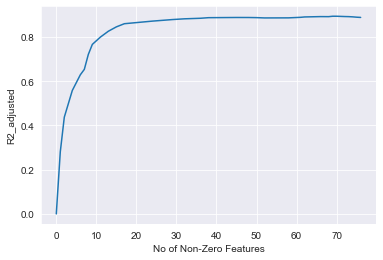

In [58]:
# plt.figure(figsize=(12,9))
sns.lineplot(x=df_tradeoff_filtered['Non-Zero Features'],
            y=df_tradeoff_filtered['R2_adj'])
plt.xlabel('No of Non-Zero Features')
plt.ylabel('R2_adjusted')

The chart above shows that first few features resulted in significant improvement in R2, but after about 10 features the improvement of each new feature is marginal.

There is diminishing improvement as more and more features are added. This can be better visualized By plotting the percentage improvement in accuracy for each additional feature:

Text(0, 0.5, 'Percentage Improvement (in R2)')

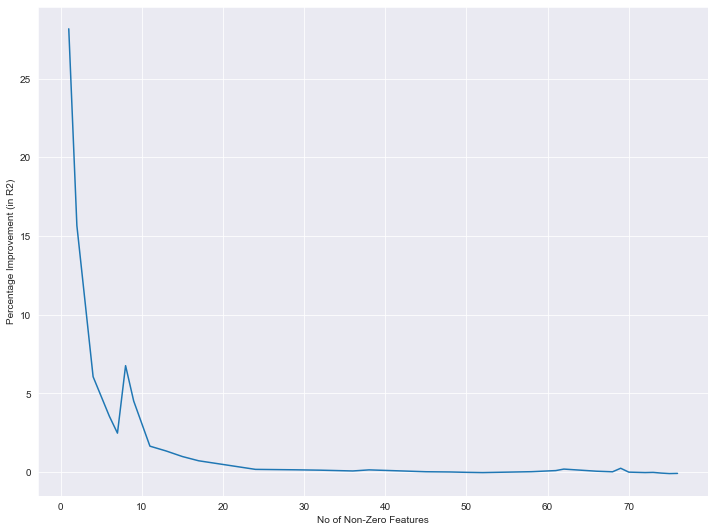

In [59]:
plt.figure(figsize=(12,9))
sns.lineplot(x=df_tradeoff_filtered['Non-Zero Features'],
            y=df_tradeoff_filtered['pct_improvement'].iloc[1:])
plt.xlabel('No of Non-Zero Features')
plt.ylabel('Percentage Improvement (in R2)')

The chart above shows that the improvement of accuracy signficantly decreases after the addition of the 8th - 10th variable

#### Selecting the number of features to be included

The data scientist will therefore have to decide on the different types of model with different complexity for various types of application:
- For the **best predictive ability and accuracy**: select the models with **high complexity and large number of variables**
    - This is because the models are typically generated and stored with high-power computers. As such, storage and computational power is no issue, and complex models can be used.
    - Other types of non-regression-based models can also be used, such as neural networks or tree-based models. These models typically are even more complex and less explainable than regression models, but would result in significantly better accuracy and performance 
- For **high explainability** or for use of simple predictions by **humans / non-technical audience**: select the **simpler models with low number of variables**
    - This is because as the number of variables in the regression increases, the contribution of each feature/variable will decrease. Furthermore, it will be more difficult to see which of the feature or models are contributing the most in affecting the target variable.
    - The first 10 features already resulted in an R2 of around 0.8, which is quite a reasonable accuracy. These simpler model could be use as an alternative to the more complex model for a heuristic model for quickly comparing prices between houses 

## Visualizing the selected features

In this section we attempt to **visualise the set of features that are selected** in the models with varying complexity. 

We will show the selected variables in a heatmap, where the hue of each cell is based on the ranking of importance (derived from the regression coefficients) of each feature

In [60]:
df_coefficients = pd.DataFrame() # instantiating a data frame to store the regression coefficients

warnings.filterwarnings('ignore') # disabling convergence warning

for x in df_tradeoff_filtered['alpha'].unique(): # looping through all the alphas from the previous dataframe
    model = linear_model.Lasso(alpha = x) # instantiating the Lasso regression model
    model.fit(X_train,y_train) # fitting the model
    
    features = X.columns[model.coef_ != 0] # storing the name of all the non-zero variables
    coefs = model.coef_[model.coef_ != 0] # storing the coefficients of all the non-zero variables
    
    # assigning the coefs of each variables above to it's own cell
    # each row will be a model with a particular complexity (i.e.: number of variables used)
    # each column will be the variables
    for feature,coef in zip(features,coefs):
        df_coefficients.loc[x,feature] = coef

warnings.filterwarnings('default') # reenabling convergence warning

df_coefficients.drop(0,axis=0,inplace=True) # deleting the row with zero coefficients

# converting all coefficients to its absolute value
for col in df_coefficients.columns:
    df_coefficients[col].values[:] = abs(df_coefficients[col].values[:])

feature_names = {feature.split('_')[0] for feature in df_coefficients.columns} # Getting the feature names from the one-hot encoded variables

df_coefficients_filtered = pd.DataFrame() # creating a data frame that will contain the filtered coefficients (this dataframe will contain FEATURES instead of VARIABLES)

for feature_name in feature_names: # looping through each feature
    df_coefficients_filtered[feature_name] = df_coefficients.filter(regex=feature_name).max(axis=1) # selecting only the variable (in each feature) with the highest coefficient
    df_coefficients_filtered[feature_name] = df_coefficients_filtered[feature_name].replace({'0':np.nan, 0:np.nan}) # replacing all the zeros with NaN (for visualization purposes)

# ordering the dataframes based on the number of nulls in each column
df_coefficients_filtered = df_coefficients_filtered[df_coefficients_filtered.isna().sum().sort_values().index] 
df_coefficients = df_coefficients[df_coefficients.isna().sum().sort_values().index]

# setting the index value as the number of non-zero features (or variables) in the model
df_coefficients_filtered.index = df_coefficients_filtered.count(axis=1).values
df_coefficients.index = df_coefficients.count(axis=1).values

# converting the cell value from the actual coefficient values to the row-wise (model-wise) rank (1 = highest importance or highest coefficient)
df_coefficients_filtered = df_coefficients_filtered.rank(axis=1,ascending=False).astype('int',errors='ignore')

Text(0.5, 160.0, 'Model with n Features')

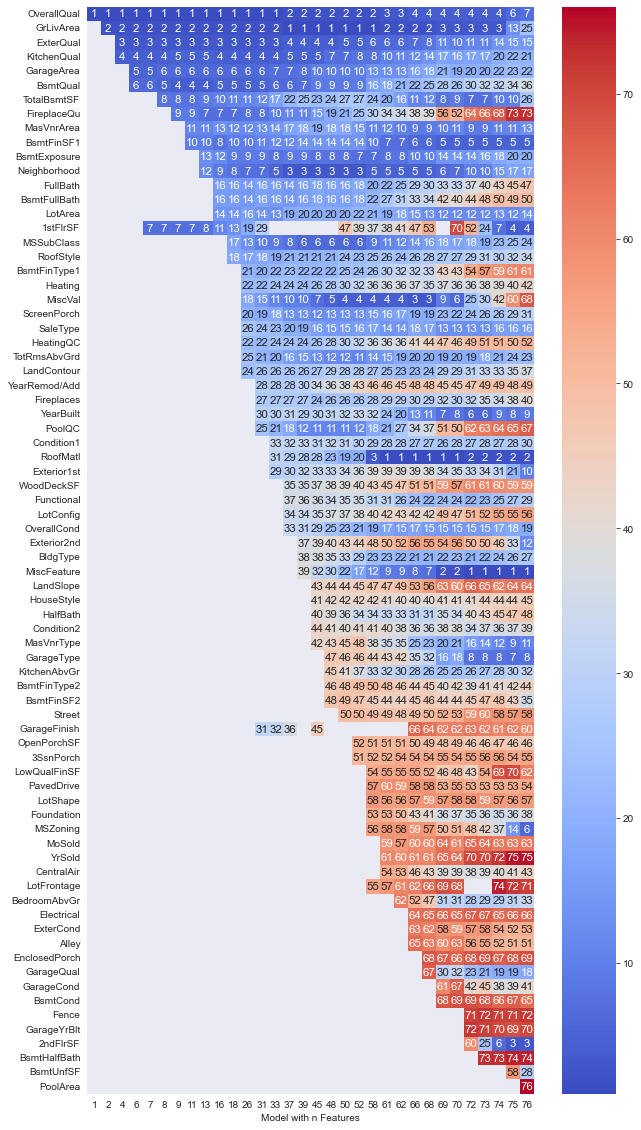

In [61]:
plt.figure(figsize = (10,20))
sns.heatmap(df_coefficients_filtered.T,cmap='coolwarm',annot=True,annot_kws={'fontsize':11.5})
plt.xlabel('Model with n Features')

(Note that the heatmap plotted above is transpose in order to be viewed properly)

The heatmap above shows the selected features in the different models with varying complexity.
- Each row is a specific feature 
- Each column is a specific model (the number of features in the model is displayed as the column index)
- Each cell shows the column-wise (model-wise) ranking of importance of the feature

Based on the figure above, we can derive the following conclusions:
- The features that are selected in simpler models, remain selected in the more complex models
- The features that are selected earlier, typically have higher ranking of importance
    - i.e.: features such as (OverallQual and GrLivArea) are selected early, and are ranked in the top 5 in most models
- The ranking of importance of each feature tend to be quite stable (especially for models with complexity up to those suggested by Lasso)
    - i.e.: each feature typically ranked consistently high (e.g.: OverallQual, GrLivArea), while others are ranked consistently low (e.g.: GarageYrBlt,Fence)

<AxesSubplot:>

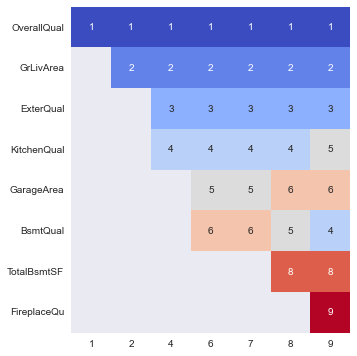

In [62]:
plt.figure(figsize = (5,6))
sns.heatmap(df_coefficients_filtered.T.iloc[:8,:7],cmap='coolwarm',annot=True,cbar=False)

Furthermore, based on the top rows of the heatmap, we can infer the most important features, based on those that are consistently highly ranked:
- Overall Quality
- Above-ground Living Area
- Kitchen Quality
- Exterior Quality
- Garage Area
- Basement Quality
- Total Basement Size
- Fireplace Quality

Do note that this features are similar to those which are highly correlated to the target variable (during the EDA process)

As such, the following feature analysis will be conducted on these top 8 features/variables 

## Feature Importance

We will now assess the relative importance of the top 8 variables. This can be done by comparing the coefficients obtained from regression analysis on the standardized variables.

In [63]:
top_variables = (df_coefficients.columns[:8]) # getting the top 8 variables
top_variables # displaying the top variables

Index(['OverallQual', 'GrLivArea', 'KitchenQual', 'ExterQual', 'BsmtQual',
       'GarageArea', 'TotalBsmtSF', 'FireplaceQu'],
      dtype='object')

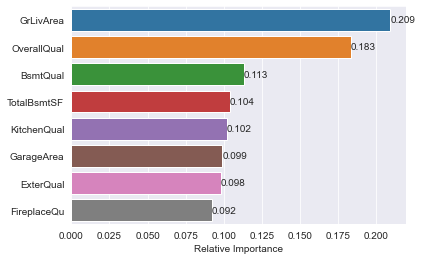

In [64]:
simple_lr_model = linear_model.LinearRegression().fit(X_train[top_variables],y_train) # fitting a simple linear regression model on the top variables from the (already standardized) training dataset
simple_lr_coefficients = pd.DataFrame(simple_lr_model.coef_,columns=top_variables,index=['Relative Importance']).T # storing the cofficients in a dataframe
simple_lr_coefficients.sort_values('Relative Importance',ascending=False,inplace=True) # sorting the dataframe from the highest to lowest relative importance
simple_lr_coefficients = simple_lr_coefficients / simple_lr_coefficients.sum()

ax = sns.barplot(data=simple_lr_coefficients.round(3),y=simple_lr_coefficients.index,x='Relative Importance') # plotting the relative importance in a bar plot
ax.bar_label(ax.containers[0]) # displaying the coefficients
plt.show()

top_variables = simple_lr_coefficients.index

- All variables have positive correlation with target variable
- The variable with the highest importance in the Above-Ground Living Area, which is closely followed by the Overall Quality.
- The other six variables have very similar relative importance factor, which is around 44-54% of the importance of the Above-Ground Living Area

## Explanation of Features

In this section, will explain the top 8 features (based on importance) obtained in the regression models.

In [65]:
top_variables

Index(['GrLivArea', 'OverallQual', 'BsmtQual', 'TotalBsmtSF', 'KitchenQual',
       'GarageArea', 'ExterQual', 'FireplaceQu'],
      dtype='object')

#### Creating Functions to conduct EDA on feature

In [66]:
# a function for running simple linear regression model On a particular feature and obtaining the regression coefficient
def display_coef(variable):
    return linear_model.LinearRegression(fit_intercept=False).fit(X[[variable]],y).coef_[0] # returns the coefficient based on a simple linear regression model

# A function for displaying figures and statistics for EDA of categorical (or discrete) variables
def display_eda_categorical(variable_name):
    
        
    print(f'{variable_name} | {data_dictionary[variable_name]}') # displaying the name of the variable along with explanation from the data dictionary
    print('\n')
    
    col_order = df.groupby(variable_name).mean()['SalePrice'].sort_values().index # getting the order of columns (based on the sale price)

    print('Count Plot')
    sns.countplot(x=df[variable_name],order=col_order) # displaying the count plot of the variable
    plt.show()
    print('\n')
    
    print('Box Plot')
    if presentation_plotting:
        sns.boxplot(x=df[variable_name],y=df['SalePrice'],order=col_order,
                    boxprops={'linewidth':1.5,'edgecolor':'white'}, # comment these out for non-presentation plotting
                    capprops={'linewidth':1.5,'color':'white'}, # comment these out for non-presentation plotting
                    whiskerprops={'linewidth':1.5,'color':'white'}, # comment these out for non-presentation plotting
                    flierprops={'linewidth':1.5,'color':'white','markeredgecolor':'white'}, # comment these out for non-presentation plotting)
                    )  # display the box plot of the variable against the target variable
    else:
            sns.boxplot(x=df[variable_name],y=df['SalePrice'],order=col_order)  # display the box plot of the variable against the target variable
    plt.show()
    print(f'Coefficient = ${round(display_coef(variable_name))} / unit change in variable') # display the simple linear regression model coefficient of the variable on the target variable
    
    
# A function for displaying figures and statistics for EDA of numerical / continuous variables
def display_eda_numerical(variable_name):
    print(f'{variable_name} | {data_dictionary[variable_name]}')
    print('\n')
        
    print('Histogram')
    sns.histplot(x=df[variable_name],kde=True) # displaying the Histogram of the variable
    plt.show()
    print('\n')
    
    print('Scatter Plot')
    sns.regplot(x=df[variable_name],y=df['SalePrice'],scatter_kws={'alpha':0.2}) # display the scatterplot of the variable against the target variable
    plt.show()
    print(f'Coefficient = ${round(display_coef(variable_name))} / unit change in variable') # display the simple linear regression model coefficient of the variable on the target variable

#### 1. Above-Ground Living Area

GrLivArea | Above grade (ground) living area square feet


Histogram


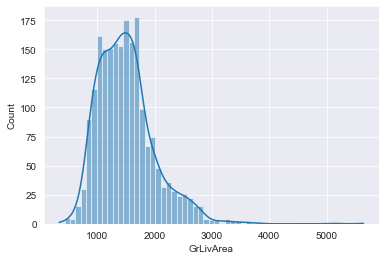



Scatter Plot


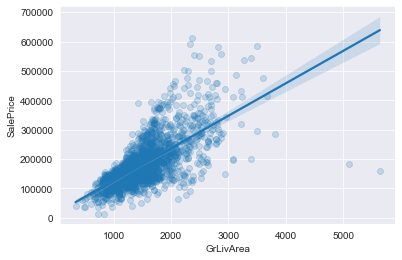

Coefficient = $120 / unit change in variable


In [67]:
display_eda_numerical(top_variables[0])

The first and most important feature for predicting the house price is the Above-Ground Living Area. This is a proxy measurement of the square-footage of the property.

Larger houses tend to be sold at a higher price. In fact, a typical measure for property price is the price per square foot. 

We can plot the histogram of the price per square foot of the houses in the dataset, and compare it with the median list price per square foot in Iowa ([*source*](https://www.homes.com/iowa/what-is-my-home-worth/#:~:text=Iowa%20Housing%20Market&text=The%20median%20list%20price%20per,addresses%20in%20the%20United%20States)).

We can see from the histogram below that the median house prices in our dataset is similar to that from the literature.

Text(65, 185, 'actual = 117')

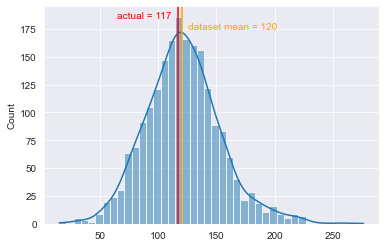

In [68]:
sns.histplot(x=df['SalePrice']/df['GrLivArea'],kde=True)

plt.axvline((df['SalePrice']/df['GrLivArea']).median(),0,200,color='orange')
plt.text((df['SalePrice']/df['GrLivArea']).median()+5,175,'dataset mean = 120',rotation=0,color='orange')

plt.axvline(117,0,200,color='r')
plt.text(65,185,'actual = 117',rotation=0,color='r')

Furthermore we also see that there are two potential outliers (highlighted in orange below). These outliers are located so far off the regression line that they can significantly impact the regression coefficient (See the blue regression line: without outliers and orange line: with outliers).

Removing these outliers could potentially improve the accuracy of the prediction. These types of improvements will be explored in the next section.

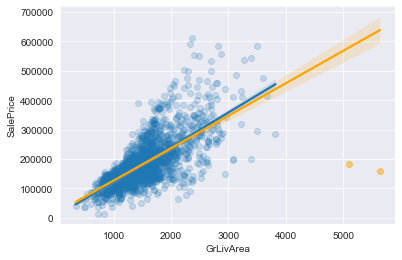

In [69]:
fig, ax = plt.subplots(nrows=1,ncols=1)
ax = sns.regplot(x=X['GrLivArea'].drop(X[X['GrLivArea']>4000].index, axis=0),
                 y=y.drop(X[X['GrLivArea']>4000].index, axis=0),
                 scatter_kws={'alpha':0.2})

ax = sns.regplot(x=X['GrLivArea'][X['GrLivArea']>4000],
                 y=y[X['GrLivArea']>4000],scatter_kws={'alpha':0.5,'color':'orange'},fit_reg=False)
ax = sns.regplot(x=X['GrLivArea'],y=y,scatter_kws={'alpha':0.0},color='orange')

#### 2. Overall Quality

OverallQual | Overall material and finish quality


Count Plot


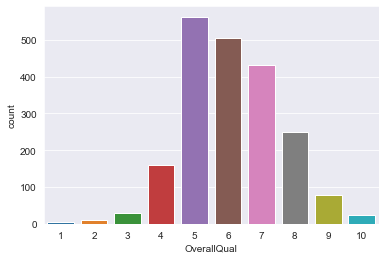



Box Plot


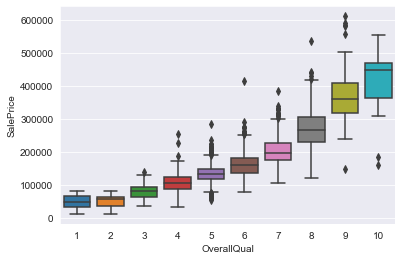

Coefficient = $30453 / unit change in variable


In [70]:
display_eda_categorical(top_variables[1])

The second most important factor is the overall quality of the property. This is indicated by an ordinal categorical variable, which has a score from 1 to 10.

Having a higher overall quality result in an increase in sale price. In fact, a score increase of 1 point will result in (on average) $30,000 increase in sale price.

It is interesting to note that there seem to be a nonlinear correlation between the quality score and the sale price. The overall quality score was given on an arbitrary linear scale, as such it might be a good idea to convert the linear scaling to a non-linear one, such as by adjusting the polynomial order of the overall quality score (e.g.: by squaring all the scores). Again, this will be explored in the next section of the project.

The remainder of the top 8 features, are also related to the quality or area of a specific region/aspect of the house. As such, the explanation for all the features would remain the same.

#### 3. Basement Quality

BsmtQual | Height of the basement


Count Plot


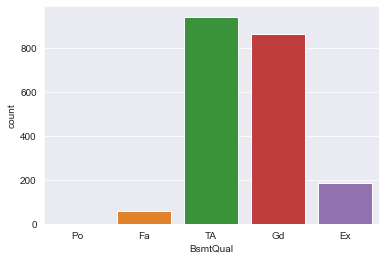



Box Plot


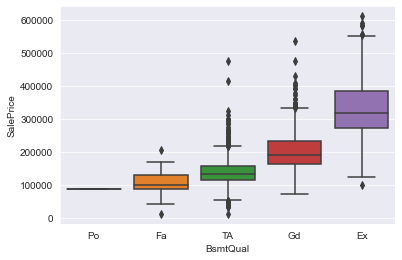

Coefficient = $51807 / unit change in variable


In [71]:
display_eda_categorical(top_variables[2])

#### 4. Total Basement Area

TotalBsmtSF | Total square feet of basement area


Histogram


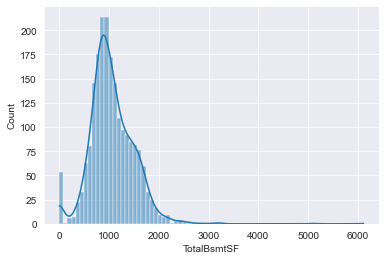



Scatter Plot


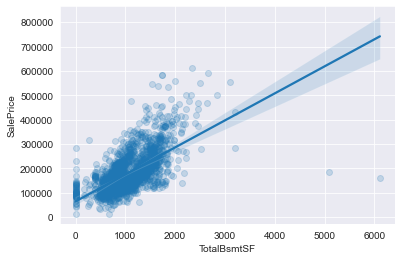

Coefficient = $162 / unit change in variable


In [72]:
display_eda_numerical(top_variables[3])

#### 5. Kitchen Quality

KitchenQual | Kitchen quality


Count Plot


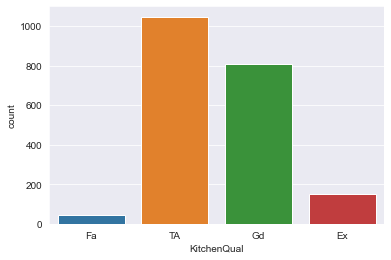



Box Plot


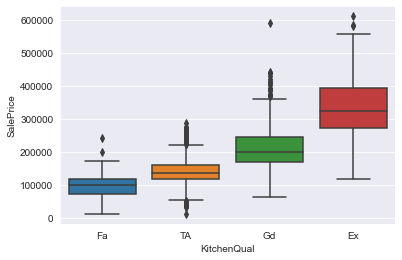

Coefficient = $52659 / unit change in variable


In [73]:
display_eda_categorical(top_variables[4])

#### 6. Garage Size (Area)

GarageArea | Size of garage in square feet


Histogram


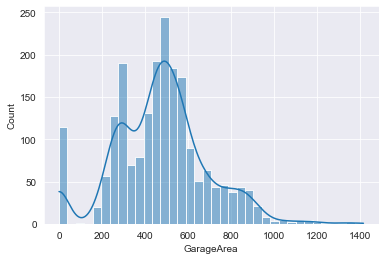



Scatter Plot


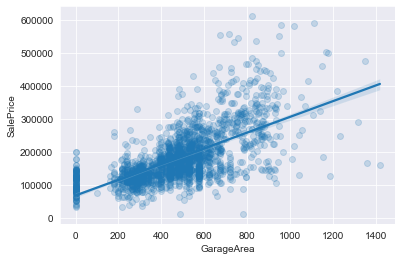

Coefficient = $358 / unit change in variable


In [74]:
display_eda_numerical(top_variables[5])

#### 7. Exterior material quality

ExterQual | Exterior material quality


Count Plot


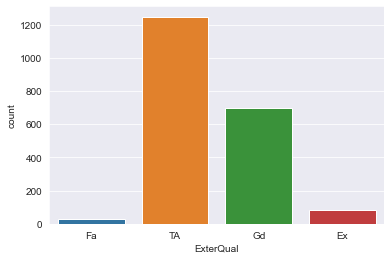



Box Plot


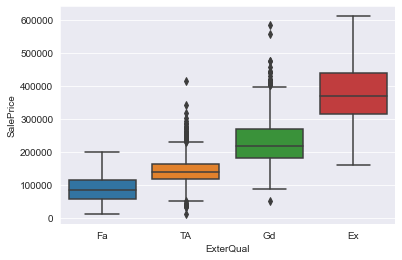

Coefficient = $54513 / unit change in variable


In [75]:
display_eda_categorical(top_variables[6])

#### 8. External Quality

FireplaceQu | Fireplace quality


Count Plot


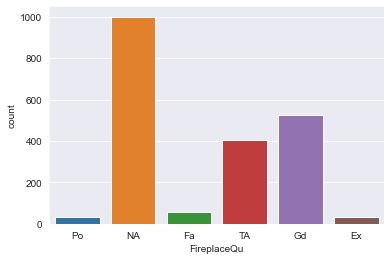



Box Plot


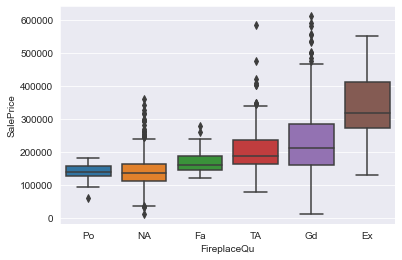

Coefficient = $62313 / unit change in variable


In [76]:
display_eda_categorical(top_variables[7])

## Improving the Model

In this section, we will take a look at potential ways to improve on the model selected by the Lasso Regression model. 

We will be exploring two main methods for improvement, namely:
- Adding nonlinearity for the ordinal variables,
- Removing potential outliers, and
- A combination of both of the above

Afterwards, we will observe how each of the methods above improve on the accuracy off the model.

### 1. Adding Non-Linearity

As mentioned in previous sections, it seems that the quality variables (which are ordinal variables) are not linearly scaled (see boxplot below). 

One way to include non linearity in the variable is by converting it to a second order polynomial, i.e.: by squaring the quality score variables.

The scatterplot below shows that the 2nd order polynomial line in blue, is a better fit than the linear line in orange, for describing the relationship between overall quality and sale price. 

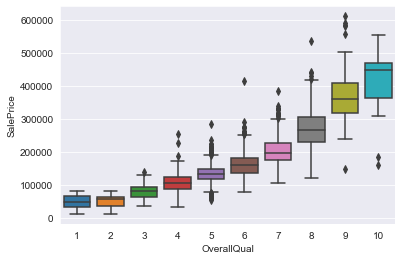

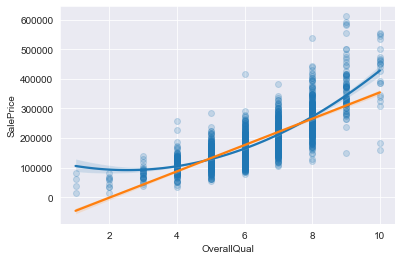

In [77]:
sns.boxplot(x=X['OverallQual'],y=y)
plt.show()

fig,ax = plt.subplots()
ax = sns.regplot(x=X['OverallQual'],y=y,scatter_kws={'alpha':0.2},order=2)
ax = sns.regplot(x=X['OverallQual'],y=y,scatter_kws={'alpha':0.0},order=1)

plt.show()

# fig,ax = plt.subplots()
# ax = sns.regplot(x=X['BsmtQual'],y=y,scatter_kws={'alpha':0.2},order=2)
# ax = sns.regplot(x=X['BsmtQual'],y=y,scatter_kws={'alpha':0.0},order=1)
# plt.show()

On the other hand, the condition variables (which are also ordinal variables) does not seem to follow a 2nd order polynomial distribution (i.e.: increasing at an increasing rate). 

Instead these variables seems to be increasing at a decreasing rate, which suggest a square-root distribution or log distribution. 

As such, all the condition variables shall be converted to a square-root distribution instead.

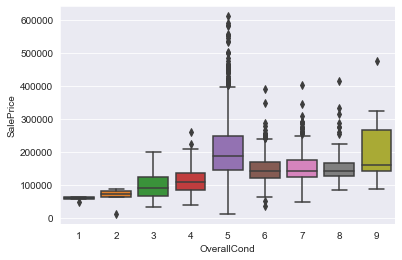

In [78]:
sns.boxplot(x=X['OverallCond'],y=y)
plt.show()

# sns.boxplot(x=X['HeatingQC'],y=y)
# plt.show()

In [79]:
quality_columns = ['OverallQual','BsmtQual','KitchenQual','ExterQual','FireplaceQu','GarageQual'] # defining the quality-related columns
conditions_columns = ['OverallCond','ExterCond','BsmtCond','HeatingQC','GarageCond','PoolQC'] # defining the condition-related columns

In [80]:
X_2 = X.copy() # creating a copy of the predictor features
X_2[quality_columns] = X[quality_columns]**2 # converting the quality columns to its squared value
X_2[conditions_columns] = X[conditions_columns]**0.5 # converting the conditions columns to its square-root value

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.30, random_state=42)

x_scaler = StandardScaler() # initialize the scaler

X_train = x_scaler.fit_transform(X_train) # fit and transform the X_train
X_train = pd.DataFrame(X_train,columns=X.columns) # retain the name of the columns in X_train dataframe

X_test = x_scaler.transform(X_test) # transform the X_test
X_test = pd.DataFrame(X_test,columns=X.columns) #

y_scaler = StandardScaler() # initialize the scaler

y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1)) # fit and transform the X_train
y_test = y_scaler.transform(y_test.values.reshape(-1, 1)) # transform the X_test

# Use GridsearchCV to obtain the best parameter in the Lasso regression model
lasso_2 = GridSearchCV(estimator=linear_model.Lasso(),  # setting model as lasso
                      param_grid={'alpha':np.logspace(-3,1,25)}, # defining search grid for alpha
                      scoring='neg_mean_absolute_error', # defining scoring function
                      n_jobs=-1, # setting to run on all processors
                      verbose=3 # increase verbosity to show steps (shown in the terminal)
                       ).fit(X_train, y_train) # fitting the model 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [81]:
best_models_2 = export_results(lasso_2)
best_models_2['Regression Type'] = 'Lasso (with non-linear ordinal variables)'

pd.concat([best_models,best_models_2])

,Regression Type,Non-Zero Variables,Non-Zero Features,MAE,RMSE,R2,R2_adj
0,Baseline (mean),0,0,0.725674,0.966447,-0.001048,-0.001048
0,Ridge,191,76,0.233155,0.328329,0.884464,0.872593
0,ElasticNet,126,59,0.230429,0.323886,0.887570,0.880207
0,Lasso,103,57,0.226923,0.316802,0.892434,0.886743
0,Lasso (with non-linear ordinal variables),98,56,0.217876,0.302574,0.901879,0.896952


The table above shows that by adding nonlinear ordinal variables, they're able to increase the R2 by about 0.01. 

### 2. Removing Outliers

Another way to improve the accuracy of the model is by removing outliers.

As mentioned in previous sections there are two data points that are potential outliers. These outliers are located very far off from the other observations, and may result in inacurate predictions.

Therefore, in this section we will attempt to remove these outliers (defined as those with Above-Ground Living Area of more than 4000 sqft) and re-running the Lasso model.

In [82]:
# dropping the outliers in both the X and the y
X_3 = X.drop(X[X['GrLivArea']>4000].index, axis=0)
y_3 = y.drop(X[X['GrLivArea']>4000].index, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.30, random_state=42)


x_scaler = StandardScaler() # initialize the scaler

X_train = x_scaler.fit_transform(X_train) # fit and transform the X_train
X_train = pd.DataFrame(X_train,columns=X.columns) # retain the name of the columns in X_train dataframe

X_test = x_scaler.transform(X_test) # transform the X_test
X_test = pd.DataFrame(X_test,columns=X.columns) #

y_scaler = StandardScaler() # initialize the scaler

y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1)) # fit and transform the X_train
y_test = y_scaler.transform(y_test.values.reshape(-1, 1)) # transform the X_test

# Use GridsearchCV to obtain the best parameter in the Lasso regression model
lasso_3 = GridSearchCV(estimator=linear_model.Lasso(),  # setting model as lasso
                      param_grid={'alpha':np.logspace(-3,1,25)}, # defining search grid for alpha
                      scoring='neg_mean_absolute_error', # defining scoring function
                      n_jobs=-1, # setting to run on all processors
                      verbose=3 # increase verbosity to show steps (shown in the terminal)
                       ).fit(X_train, y_train) # fitting the model 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [83]:
best_models_3 = export_results(lasso_3)
best_models_3['Regression Type'] = 'Lasso (with removal of outliers)'

pd.concat([best_models,best_models_2,best_models_3])

,Regression Type,Non-Zero Variables,Non-Zero Features,MAE,RMSE,R2,R2_adj
0,Baseline (mean),0,0,0.725674,0.966447,-0.001048,-0.001048
0,Ridge,191,76,0.233155,0.328329,0.884464,0.872593
0,ElasticNet,126,59,0.230429,0.323886,0.887570,0.880207
0,Lasso,103,57,0.226923,0.316802,0.892434,0.886743
0,Lasso (with non-linear ordinal variables),98,56,0.217876,0.302574,0.901879,0.896952
0,Lasso (with removal of outliers),92,55,0.219964,0.307873,0.913873,0.909826


The table above shows that just by removing two outlier data points (~ 0.1% of the data) we are able to improve the accuracy of the model by about 1%. In fact, this improvement is slightly better than that brought about by adding nonlinear ordinal variables.

Furthermore, we can also see that removing these outliers also resulted in a significant reduction in the number of variables being selected. This is perhaps due to the fact that these outliers resulted in several features having inflated effect on the target variable.

### 3. Combination

Finally we can combine the two previous methods in order to generate a more accurate prediction.

In [84]:
# dropping outliers
X_4 = X.drop(X[X['GrLivArea']>4000].index,axis=0)
y_4 = y.drop(X[X['GrLivArea']>4000].index,axis=0)

# getting non-linear ordinal variables
X_4[quality_columns] = X[quality_columns]**2
X_4[conditions_columns] = X[conditions_columns]**0.5

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, test_size=0.30, random_state=42)

x_scaler = StandardScaler() # initialize the scaler

X_train = x_scaler.fit_transform(X_train) # fit and transform the X_train
X_train = pd.DataFrame(X_train,columns=X.columns) # retain the name of the columns in X_train dataframe

X_test = x_scaler.transform(X_test) # transform the X_test
X_test = pd.DataFrame(X_test,columns=X.columns) #

y_scaler = StandardScaler() # initialize the scaler

y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1)) # fit and transform the X_train
y_test = y_scaler.transform(y_test.values.reshape(-1, 1)) # transform the X_test

In [85]:
# Use GridsearchCV to obtain the best parameter in the Lasso regression model
lasso_4 = GridSearchCV(estimator=linear_model.Lasso(),  # setting model as lasso
                      param_grid={'alpha':np.logspace(-3,1,25)}, # defining search grid for alpha
                      scoring='neg_mean_absolute_error', # defining scoring function
                      n_jobs=-1, # setting to run on all processors
                      verbose=3 # increase verbosity to show steps (shown in the terminal)
                       ).fit(X_train, y_train) # fitting the model 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [86]:
best_models_4 = export_results(lasso_4)
best_models_4['Regression Type'] = 'Lasso (combined)'

pd.concat([best_models,best_models_2,best_models_3,best_models_4]).reset_index(drop=True)

,Regression Type,Non-Zero Variables,Non-Zero Features,MAE,RMSE,R2,R2_adj
0,Baseline (mean),0,0,0.725674,0.966447,-0.001048,-0.001048
1,Ridge,191,76,0.233155,0.328329,0.884464,0.872593
2,ElasticNet,126,59,0.230429,0.323886,0.887570,0.880207
3,Lasso,103,57,0.226923,0.316802,0.892434,0.886743
4,Lasso (with non-linear ordinal variables),98,56,0.217876,0.302574,0.901879,0.896952
5,Lasso (with removal of outliers),92,55,0.219964,0.307873,0.913873,0.909826
6,Lasso (combined),92,52,0.215747,0.298692,0.918933,0.915124


The table above summarizes all the models studied in this project. 

Combining the two previous methods resulted in the best model, resulting in the highest accuracy as well as the least number of features and variables included.

The final accuracy of the model is R2 = 0.919 with and R2_adjusted = 0.915.

## Accuracy-Complexity Tradeoff (Improved Models)

In [87]:
# creating function to create accuracy-complexity tradeoff table

def generate_multiple_tradeoff(X_cur,y_cur,name):

    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_cur, y_cur, test_size=0.30, random_state=42)

    x_scaler = StandardScaler() # initialize the scaler

    X_train = x_scaler.fit_transform(X_train) # fit and transform the X_train
    X_train = pd.DataFrame(X_train,columns=X.columns) # retain the name of the columns in X_train dataframe

    X_test = x_scaler.transform(X_test) # transform the X_test
    X_test = pd.DataFrame(X_test,columns=X.columns) #

    y_scaler = StandardScaler() # initialize the scaler

    y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1)) # fit and transform the X_train
    y_test = y_scaler.transform(y_test.values.reshape(-1, 1)) # transform the X_test


    df_tradeoff = pd.DataFrame() # Instantiating a data frame to contain the trade-off information

    warnings.filterwarnings('ignore') # disable convergence warnings which will happen at low alpha values

    for x in (np.concatenate([np.logspace(-5,np.log10(0.6),50),
                             [0.328786,0.326078125,0.201391,0.199087]])): # adding more points to get specific number of non-zero features
        model = linear_model.Lasso(alpha = x) # instantiating a Lasso regression model with specific alpha
        model.fit(X_train,y_train) # fitting the model
        tradeoff_row = export_results_tradeoff(model) # generating the trade off result
        df_tradeoff = pd.concat([df_tradeoff,tradeoff_row]) # adding the result to the trade off data frame

    warnings.filterwarnings('default') # reenabling the warnings


    # The methods used for generating the models means that there will be multiple models with the same number of variables 
    # We will only select the model with the highest R2 value for each number of variables

    df_tradeoff_filtered = pd.DataFrame() # instantiating a dataframe to keep the filtered values

    for x in df_tradeoff['Non-Zero Features'].unique(): # looping through all the unique numbers of non_zero features
        best_row = df_tradeoff[df_tradeoff['Non-Zero Features'] == x].sort_values('R2_adj',ascending=False).iloc[[0],:] # filtering for each unique non-zero features, and keeping the row with the highest R2 adjusted
        df_tradeoff_filtered = pd.concat([df_tradeoff_filtered,best_row],axis=0) # saving the best row in a new dataframe


    df_tradeoff_comparison = df_tradeoff_filtered[['Non-Zero Features','R2_adj']]
    df_tradeoff_comparison = df_tradeoff_comparison.set_index('Non-Zero Features')
    df_tradeoff_comparison.columns = [name]
    return df_tradeoff_comparison

In [88]:
# generating the tradeoff table for various models
tradeoff_lasso1 = generate_multiple_tradeoff(X,y,'Lasso')
tradeoff_lasso2 = generate_multiple_tradeoff(X_4,y_4,'Lasso (improved)')

# combining the tradeoff tables
tradeoff_combined = pd.concat([tradeoff_lasso1,tradeoff_lasso2],axis=1)

# sorting the combined tradeoff table
tradeoff_combined.sort_index(inplace=True)

<Figure size 864x648 with 0 Axes>

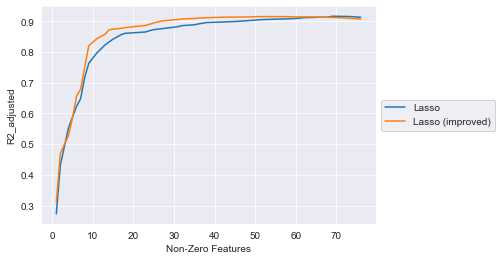

In [89]:
plt.figure(figsize=(12,9))
tradeoff_combined.interpolate().plot()
plt.ylabel('R2_adjusted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The line plot above shows the accuracy-complexity trade-off of both the original Lasso model and the improved model.

It can be seen that the the trade-off curve for the improve model is on the upper and left side of the original model. This indicates that we are able to achieve an increased accuracy for the same amount of complexity.

As such, the model improvement process will benefit both simple (those with less features) and complex (those with more features) models equally.

## Displaying the Final Model

You can then display the final regression model by presenting all the non-zero coefficients of the regression, along with its corresponding feature/variable.

In [90]:
final_model_summary = pd.DataFrame()
final_model_summary['columns'] = X.columns
final_model_summary['coef'] = lasso_4.best_estimator_.coef_
final_model_summary[final_model_summary['coef'] != 0].sort_values('coef',ascending=False).reset_index(drop=True).T

# note that due to standardization, the fitted intercept is very close to zero (4.6e-17)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91
columns,GrLivArea,OverallQual,BsmtFinSF1,ExterQual,TotalBsmtSF,Neighborhood_NridgHt,Neighborhood_StoneBr,KitchenQual,SaleType_New,YearBuilt,LotArea,OverallCond,BsmtQual,MasVnrArea,ScreenPorch,GarageArea,Functional,Neighborhood_NoRidge,Neighborhood_GrnHill,Exterior1st_BrkFace,RoofMatl_WdShngl,LandContour_HLS,Condition1_Norm,Neighborhood_Crawfor,RoofStyle_Hip,FireplaceQu,Fireplaces,GarageType_BuiltIn,HeatingQC,SaleType_Con,MasVnrType_Stone,Condition1_PosN,YearRemod/Add,TotRmsAbvGrd,Neighborhood_BrkSide,MSZoning_FV,HouseStyle_2.5Unf,BsmtFinType2,Condition2_PosA,Street_Pave,Condition1_PosA,LotConfig_CulDSac,MiscFeature_Othr,HalfBath,BsmtFullBath,WoodDeckSF,Foundation_Slab,Exterior1st_VinylSd,OpenPorchSF,Exterior2nd_AsphShn,RoofMatl_Membran,Neighborhood_NPkVill,Exterior1st_CemntBd,BsmtFinType1,Neighborhood_Somerst,BsmtFinSF2,Neighborhood_ClearCr,Neighborhood_Sawyer,HouseStyle_SLvl,HouseStyle_2.5Fin,Neighborhood_Mitchel,GarageYrBlt,Neighborhood_NAmes,Neighborhood_CollgCr,LowQualFinSF,LotConfig_FR2,Neighborhood_OldTown,Condition1_RRAe,RoofMatl_Tar&Grv,Neighborhood_Greens,Neighborhood_NWAmes,Exterior1st_HdBoard,Condition1_RRNn,MSZoning_C (all),SaleType_ConLI,LotConfig_FR3,Neighborhood_Veenker,Exterior1st_Wd Sdng,Foundation_CBlock,CentralAir_Y,MiscFeature_TenC,Exterior1st_BrkComm,Heating_Grav,BldgType_Twnhs,BedroomAbvGr,Heating_OthW,KitchenAbvGr,MasVnrType_BrkFace,RoofStyle_Mansard,BldgType_TwnhsE,MSSubClass,BsmtExposure
coef,0.304202,0.183785,0.118775,0.079004,0.07728,0.072075,0.071085,0.06698,0.064063,0.063061,0.059644,0.053306,0.052546,0.050078,0.038422,0.037438,0.03711,0.036186,0.034803,0.02784,0.026471,0.025614,0.024777,0.023319,0.019689,0.018237,0.015987,0.013954,0.013886,0.013087,0.012978,0.012813,0.01235,0.011855,0.011271,0.010509,0.010018,0.00863,0.00798,0.007577,0.006699,0.006548,0.006386,0.006268,0.006248,0.006064,0.006,0.005827,0.005396,0.00443,0.004428,0.004396,0.003714,0.00313,0.002894,0.002792,0.002744,0.002584,0.002144,0.001022,0.000662,0.000331,-0.000053,-0.000158,-0.000203,-0.000209,-0.000394,-0.001318,-0.001456,-0.001644,-0.001676,-0.002024,-0.002136,-0.002368,-0.002819,-0.003025,-0.003418,-0.003687,-0.004051,-0.004343,-0.004719,-0.006468,-0.007555,-0.008299,-0.012805,-0.018301,-0.018385,-0.021437,-0.024028,-0.027926,-0.04569,-0.050399


## Summary and Conclusion

In this project, we are tasked to assist property agents in creating models for predicting the house prices in Ames (Iowa, USA). 

- **Data Pre-Processing:** The dataset were processed through the following processes:
    - Data cleaning were conducted on the provided data set. This is done by imputing values for all of the Null values in the data set.
    - All of the ordinal categorical variables were converted to its equivalent numerical scoring
    - All of the nominal categorical variable over one-hot encoded
- **Modelling:** Three types of regularization technique (Lasso, Ridge, and ElasticNet) were applied on the data set. Out of the three techniques, Lasso resulted in the high accuracy and the lowest number of features included. The Lasso model achieved an R2 of 0.892 in predicting the test dataset.
- **Most important features:** The two features that can best predict house price is the above ground living area as well as the overall quality of the house. It is followed by a series of features which measures the area and quality of various specific location / aspect of the house.
- **Accuracy-Complexity Tradeoff:** Assuming no overfitting, the accuracy of the model increases as the number of features included increases. This is the trade-off between accuracy and complexity. There is a diminishing returns to adding more features. It was found that using around 10 features already resulted in a model with an R2 of aroudn 0.8. This simple model can be used as a heuristic model for humans when comparing the prices of different houess.
- **Model Improvement:** Two methods for further improving the model were attempted:
    - Converting ordinal variables to non-linear
    - Removing outliers
    - A combination of both
- The techniques mentioned above resulted in significant improvement in accuracy as well as a reduction in number of features selected.
- **Final Model:** The final model has an R2 of 0.919 in predicting the test dataset, while using only ~ 50% of the potential variables from about ~68% of available features.

The table below summarizes all the models studied in this project. 

|No  | Regression Type                           |   Non-Zero Variables |   Non-Zero Features |      MAE |     RMSE |          R2 |      R2_adj |
|---:|:------------------------------------------|---------------------:|--------------------:|---------:|---------:|------------:|------------:|
|  1 | Baseline (mean)                           |                    0 |                   0 | 0.725674 | 0.966447 | -0.001048   | -0.001048   |
|  2 | Ridge                                     |                  191 |                  76 | 0.233155 | 0.328329 |  0.884464   |  0.872593   |
|  3 | ElasticNet                                |                  126 |                  59 | 0.230429 | 0.323886 |  0.887570   |  0.880207   |
|  4 | Lasso                                     |                  103 |                  57 | 0.226923 | 0.316802 |  0.892434   |  0.886743   |
|  5 | Lasso (with non-linear ordinal variables) |                   98 |                  56 | 0.217876 | 0.302574 |  0.901879   |  0.896952   |
|  6 | Lasso (with removal of outliers)          |                   92 |                  55 | 0.219964 | 0.307873 |  0.913873   |  0.909826   |
|  7 | Lasso (combined)                          |                   92 |                  52 | 0.215785 | 0.298797 |  0.918876   |  0.915107   |

## Future works

The following items may be investigated for future works:
- Comparing selected variables from Lasso against those from  SelectKBest
- Add interaction terms for several variables
- Use of more complex models to improve accuracy, such as using Tree-Based models or Boosting
- Adjusting SalePrice for inflation (depending on the YearSold)
- See impact of housing bubble, if any
    - (compare prices of house sold before and after 2008)


## Generating Kaggle Prediction

This extra section is for generating the prediction for the Kaggle competition. The initial data processing is done in another notebook.

In [91]:
df_test = pd.read_csv('../datasets/test_processed.csv')

In [92]:
y_id = df_test['Id']
df_test.drop('Id',axis=1,inplace=True)

In [93]:
missing_columns = list(set(X.columns)-set(df_test.columns))
df_test[missing_columns] = 0

extra_columns = list(set(df_test.columns)-set(X.columns))
df_test.drop(extra_columns,axis=1,inplace=True)

column_order = X_4.columns
df_test = df_test[column_order]

In [94]:
df_test = x_scaler.transform(df_test)
df_test = pd.DataFrame(df_test,columns=column_order)

In [95]:
y_test_pred = lasso_4.predict(df_test)

In [96]:
y_test_pred = y_scaler.inverse_transform(y_test_pred.reshape(-1,1))
y_test_pred = pd.DataFrame(y_test_pred,columns=['Prediction'])

In [97]:
sanity_check = y_test_pred.describe() # sanity check (comparing output's against the target variables that we know)
sanity_check['Existing'] = y.describe() 
sanity_check['Ratio'] = sanity_check['Prediction'] / sanity_check['Existing'] 
sanity_check

,Prediction,Existing,Ratio
count,878.000000,2051.000000,0.428084
mean,169361.669881,181469.701609,0.933278
std,73724.478888,79258.659352,0.930176
min,5337.813071,12789.000000,0.417375
25%,117480.826907,129825.000000,0.904917
50%,151215.223934,162500.000000,0.930555
75%,208354.930209,214000.000000,0.973621
max,552491.646208,611657.000000,0.903270


In [98]:
submission_df = pd.concat([y_id,y_test_pred],axis=1)
submission_df.columns = ['Id','SalePrice']
submission_df

,Id,SalePrice
0,2658,121423.679608
1,2718,152286.088799
2,2414,220012.636417
3,1989,101005.594804
4,625,172247.235183
...,...,...
873,1662,180081.245875
874,1234,210379.742954
875,1373,115319.456057
876,1672,98456.544700


In [99]:
submission_df.to_csv('../datasets/test_sub_reg.csv')